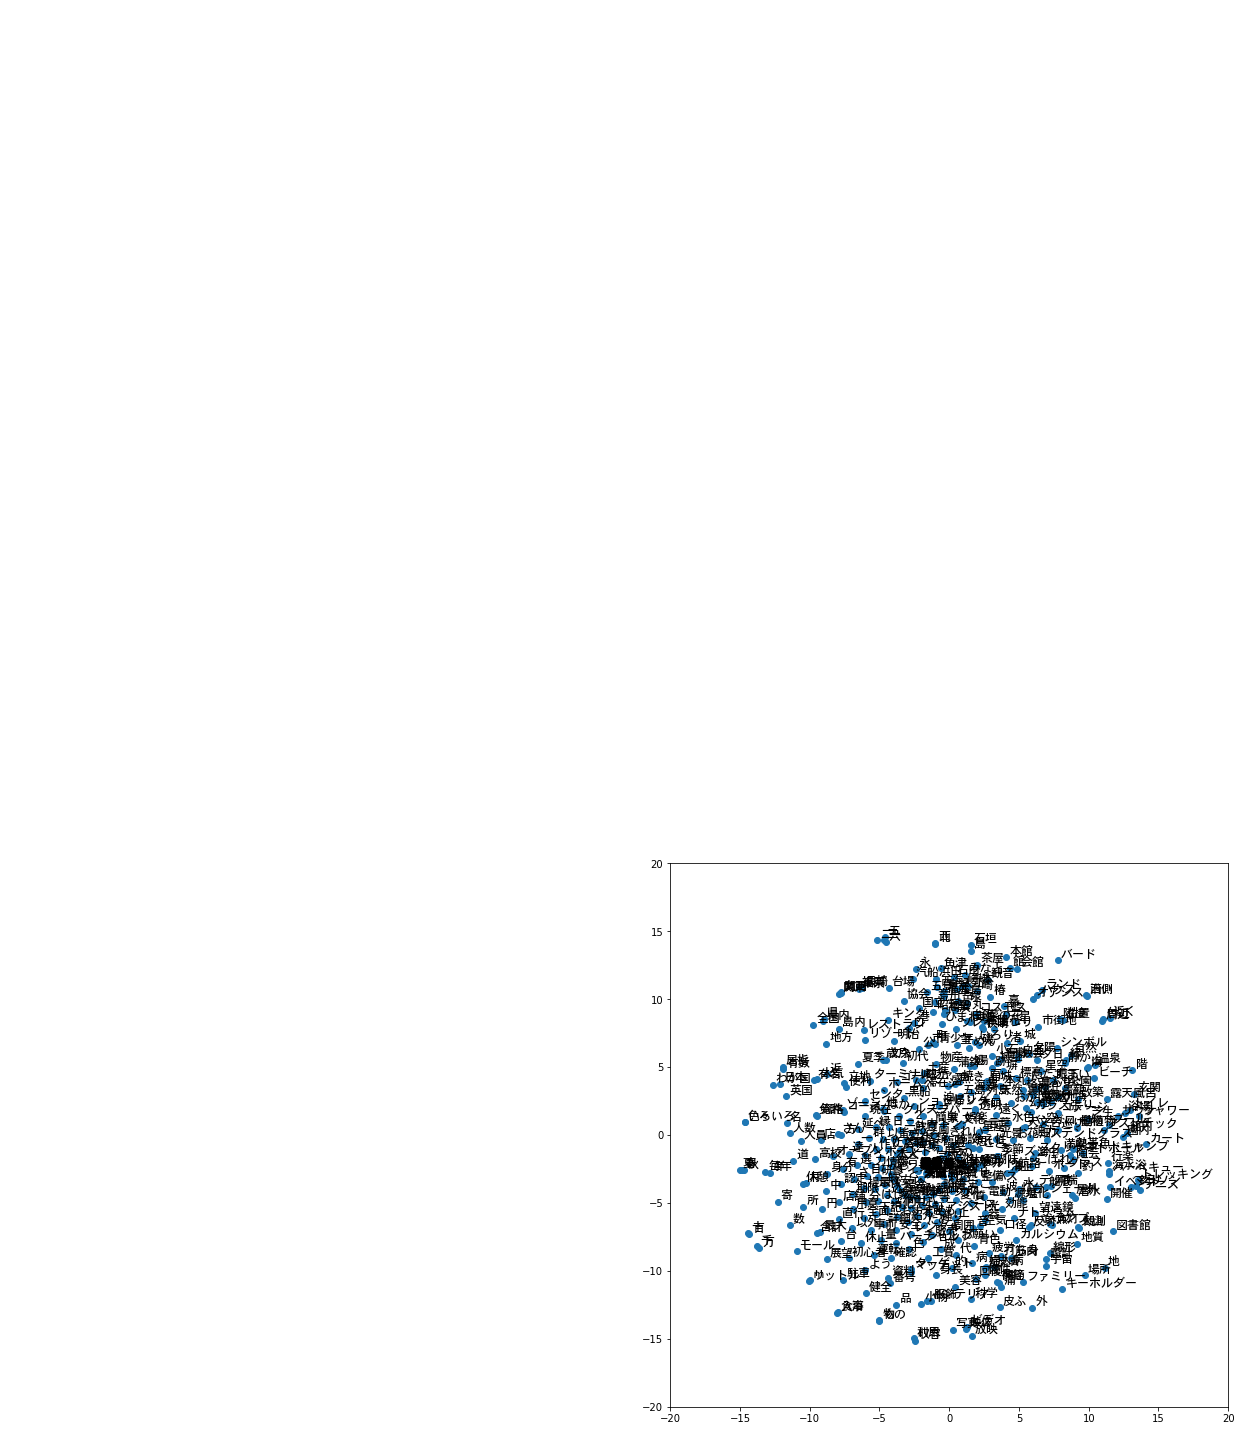

In [6]:
#AI-TECHGYM-1-14-A-3
#自然言語処理

#インポート
import numpy as np
import pandas as pd

#次元削減
from sklearn.manifold import TSNE

#グラフ
from matplotlib import pylab as plt
%matplotlib inline
import matplotlib.font_manager as font_manager

# word2vec データ読み込み
from gensim.models import KeyedVectors

#フォントの準備
import urllib.request as req
url = "https://github.com/hokuto-HIRANO/Word2Vec/raw/master/font/Osaka.ttc"
req.urlretrieve(url, "./Osaka.ttc")

#フォント指定
FONTPATH='./Osaka.ttc'
prop = font_manager.FontProperties(fname=FONTPATH)

#グラフサイズ
plt.figure(figsize=(10,10))

# ダウンロード先のパスを指定
MODEL_FILENAME = "./stanby-jobs-200d-word2vector.bin"
w2v = KeyedVectors.load_word2vec_format(MODEL_FILENAME, binary=True)

# データの読み込み
df = pd.read_csv("words.csv") 

#ベクトルの取得
vectors = []
zero_vec = np.zeros(200)

for w in df["words"].values:
    try:
        vectors.append(w2v[w])
    except Exception as e:
        vectors.append(zero_vec)

#次元削減
tsne = TSNE(n_components=2, random_state=0)
V = tsne.fit_transform(vectors)

#ベクトルを平面にプロット
plt.scatter(V[:, 0], V[:,1])
plt.xlim(-20,20)
plt.ylim(-20,20)
#文字のプロット
for w, x, y in zip(df["words"].values, V[:,0], V[:,1]):
    plt.annotate(w, xy=(x, y), xytext=(3,3), textcoords='offset points', fontproperties=prop, fontsize=12)

#グラフ表示
plt.show()